In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mpg = pd.read_csv('mpg.csv')

In [4]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


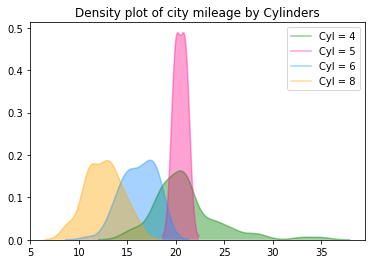

In [14]:
#1
plt.figure()

sns.kdeplot(mpg.loc[mpg.cyl == 4, 'cty'],
           shade = True,
           color = 'green',
           alpha = 0.4,
           label = "Cyl = 4")

sns.kdeplot(mpg.loc[mpg.cyl == 5, 'cty'],
           shade = True,
           color = 'deeppink',
           alpha = 0.4,
           label = "Cyl = 5")

sns.kdeplot(mpg.loc[mpg.cyl == 6, 'cty'],
           shade = True,
           color = 'dodgerblue',
           alpha = 0.4,
           label = "Cyl = 6")

sns.kdeplot(mpg.loc[mpg.cyl == 8, 'cty'],
           shade = True,
           color = 'orange',
           alpha = 0.4,
           label = "Cyl = 8")

plt.title('Density plot of city mileage by Cylinders')
plt.show()

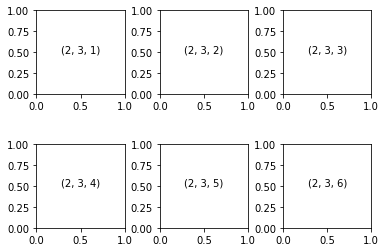

In [23]:
#2

plt.figure()

#plt.subplot(2,3, 1) #(x,y),(Rows, Columns)
#plt.subplot(2,3,2)
#plt.subplot(2,3,3)
#plt.subplot(2,3,4)
# Instead we can use a forloop to create six subplots, and then
# just edit the forloop to make changes.

for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5, str((2,3,i)), ha = 'center')     #(x coordinate, y coordinate, text) #use str to change i to it's value
    
# if we only run the above command, the axis labels will overlap. So we need to adjust

plt.subplots_adjust(hspace = 0.6, wspace = 0.4) #where hspace = heightspace , wspace = widthspace

plt.show()

<Figure size 432x288 with 0 Axes>

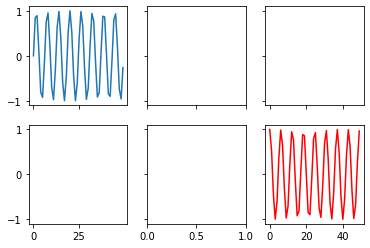

In [74]:
#3

plt.figure()

fig, ax = plt.subplots(2,3, sharex = 'col', sharey = 'row')    #notice subplots --> plural as compared to before
#to make sure that the axis is shared for x and y, sharex and sharey
x = np.linspace(0,50)

ax[0,0].plot(np.sin(x))
ax[1,2].plot(np.cos(x), color = 'red')

ax[0,0].set_xticks(np.arange(0,50,25))

# x, y = 2,3 will assign 2 to x and 3 to y.
plt.show()

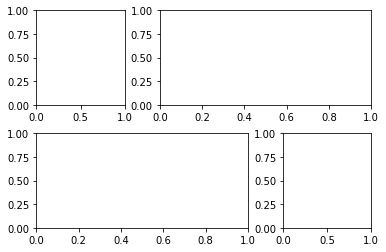

In [36]:
#4

fig = plt.figure() #assign it to fig, so we can add things later on


grid = plt.GridSpec(2,3, wspace = 0.4, hspace = 0.3)


fig.add_subplot(grid[0,0])
fig.add_subplot(grid[0,1:3])
fig.add_subplot(grid[1,0:2]) ## or grid[1,:-1]
fig.add_subplot(grid[1,2])

plt.show()

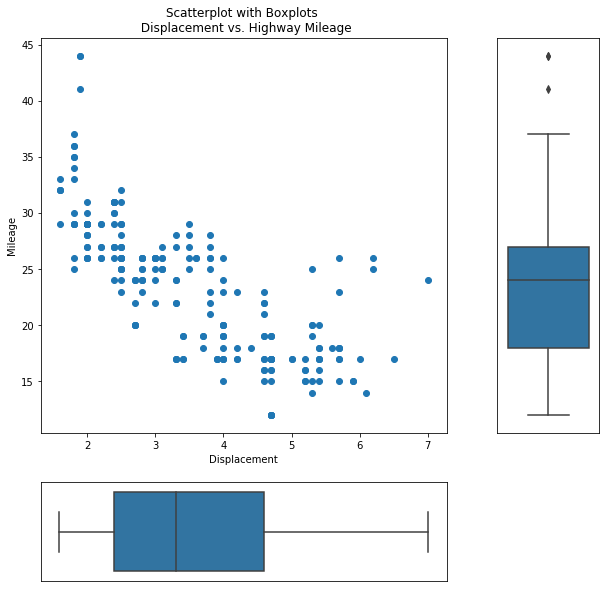

In [51]:
#5

fig = plt.figure(figsize = (10,10))

grid = plt.GridSpec(4,4, wspace =0.5, hspace = 0.5)

main_plot = fig.add_subplot(grid[0:3,0:3])
right_plot = fig.add_subplot(grid[0:3,3], xticklabels = [], yticklabels = []) #passing ticks as empty lists gets rid of them
bottom_plot = fig.add_subplot(grid[3,0:3], xticklabels = [], yticklabels = []) 

# Main plot
main_plot.scatter(mpg.displ, mpg.hwy)

# Right boxplot
sns.boxplot(mpg.hwy, ax = right_plot, orient = 'v')
right_plot.set(ylabel = "", xticks = [],yticks = [])

# Bottom boxplot
sns.boxplot(mpg.displ, ax = bottom_plot)
bottom_plot.set(xlabel = "", xticks = [], yticks = [])

main_plot.set(title = 'Scatterplot with Boxplots \n Displacement vs. Highway Mileage',
             xlabel = 'Displacement', ylabel = 'Mileage')
plt.show()

In [52]:
#6

eco = pd.read_csv('economics.csv')
eco.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


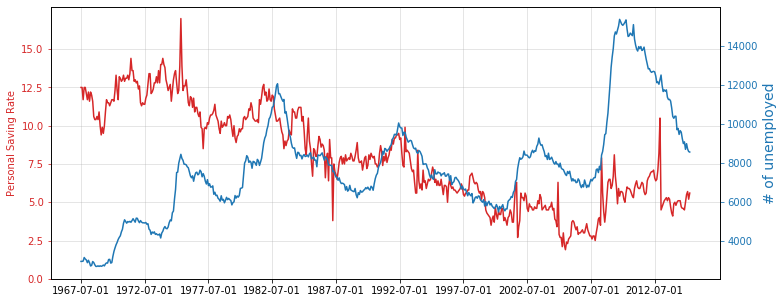

In [72]:
plt.figure(figsize = (12,5))

plt.plot(eco.date, eco.psavert, color = 'tab:red')

#set the main y axis(left)
ax = plt.gca()
ax.set_ylabel("Personal Saving Rate", color = 'tab:red')

#create the x-axis labels
ax = plt.gca()
ax.tick_params(axis = 'y', labelcolor = 'tab:red', color = 'tab:red')
ax.set_yticks(np.arange(0,17.5,2.5)) #(x,y,step)

#set the secondary y-axis (right)
ax_right = ax.twinx()
ax_right.plot(eco.date, eco.unemploy, color = 'tab:blue')
ax_right.set_ylabel('# of unemployed', color = 'tab:blue', fontsize = 14)
ax_right.tick_params(axis = 'y', labelcolor = 'tab:blue', color = 'tab:blue')

ax.set_xticks(np.arange(0,len(eco.date), 60)) #every5 years (60 months)

ax.grid(alpha = 0.4)
plt.show()